In [30]:
import pandas as pd
import matplotlib.pyplot as plt

#### Importing dataset

In [5]:
mall_cust_df = pd.read_csv("Mall_Customers - Mall_Customers.csv")
mall_cust_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


#### Features

In [8]:
mall_cust_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### Null values

In [6]:
mall_cust_df.isnull().sum()

CustomerID                0
Gender                    1
Age                       1
Annual Income (k$)        1
Spending Score (1-100)    0
dtype: int64

In [27]:
for column in mall_cust_df.columns:
    if mall_cust_df[column].dtype=='object':
        mall_cust_df[column] = mall_cust_df[column].fillna(mall_cust_df[column].mode())
    else:
        mall_cust_df[column] = mall_cust_df[column].fillna(mall_cust_df[column].mean())

In [29]:
mall_cust_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Distribution of Age

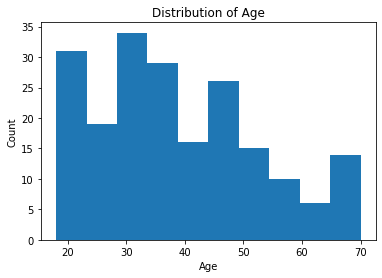

In [35]:
plt.hist(mall_cust_df['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [36]:
# correlation

In [52]:
print("Correlation: \n", mall_cust_df.corr()['Spending Score (1-100)'])

Correlation: 
 CustomerID                0.013835
Age                      -0.327227
Annual Income (k$)        0.009903
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64


In [53]:
# Cust ID has highest corr

In [63]:
#hot encoding 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# encoded_featres = encoder.fit_transform(mall_cust_df['Gender'])
# encoded_featres
encoded_catagoricals= pd.get_dummies(mall_cust_df['Gender'])

In [64]:
encoded_catagoricals

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [69]:
mall_cust_df=pd.merge(mall_cust_df,encoded_catagoricals,how='left',left_index=True,right_index=True)

In [70]:
mall_cust_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19.0,15.0,39,0,1
1,2,Male,21.0,15.0,81,0,1
2,3,Female,20.0,16.0,6,1,0
3,4,Female,23.0,16.0,77,1,0
4,5,Female,31.0,17.0,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35.0,120.0,79,1,0
196,197,Female,45.0,126.0,28,1,0
197,198,Male,32.0,126.0,74,0,1
198,199,Male,32.0,137.0,18,0,1


In [58]:
print("Average annual income: ",mall_cust_df['Annual Income (k$)'].mean())

Average annual income:  60.56
